### Data preprocessing
- 영상 데이터 전처리

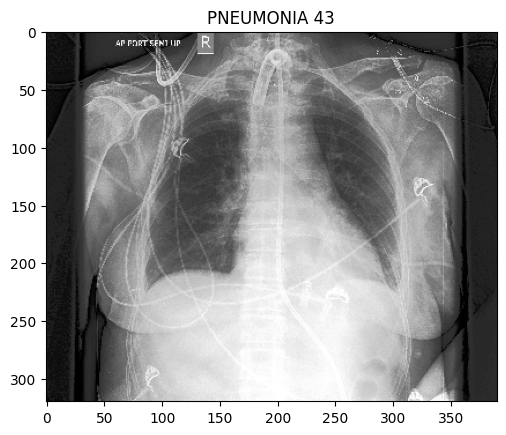

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

# data 경로 설정
# mac 윈도우 각각 경로 설정이 필요함
path = '/Users/igyuwon/data/'
data_dir = path+'Pneumonia/Positive/'
# categories = ['train','test','val'] # 전처리된 데이터셋을 훈련용, 평가용, 검증용으로 구분


# 샘플 이미지 시각화
# folder_path = os.path.join(data_dir,category,'PNEUMONIA')
img_name = os.listdir(data_dir)[42]
img_path = os.path.join(data_dir,img_name)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('PNEUMONIA 43')
plt.show()

전처리 모듈
- opencv
- matplotlib
- seaborn
- numpy
- scikit-learn

### Image Resize

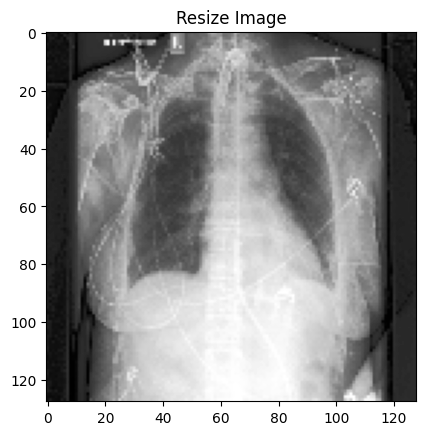

In [2]:
def resize_image(img,size=(128,128)):
    return cv2.resize(img,size)

resize_img = resize_image(img)
plt.imshow(resize_img,cmap='gray')
plt.title('Resize Image')
plt.show()
# 패딩처리하고 resize 하는게..

### Histogram Equalization
- image level 평활화

In [3]:
?cv2.equalizeHist # method 확인할 때

Object `cv2.equalizeHist # method 확인할 때` not found.


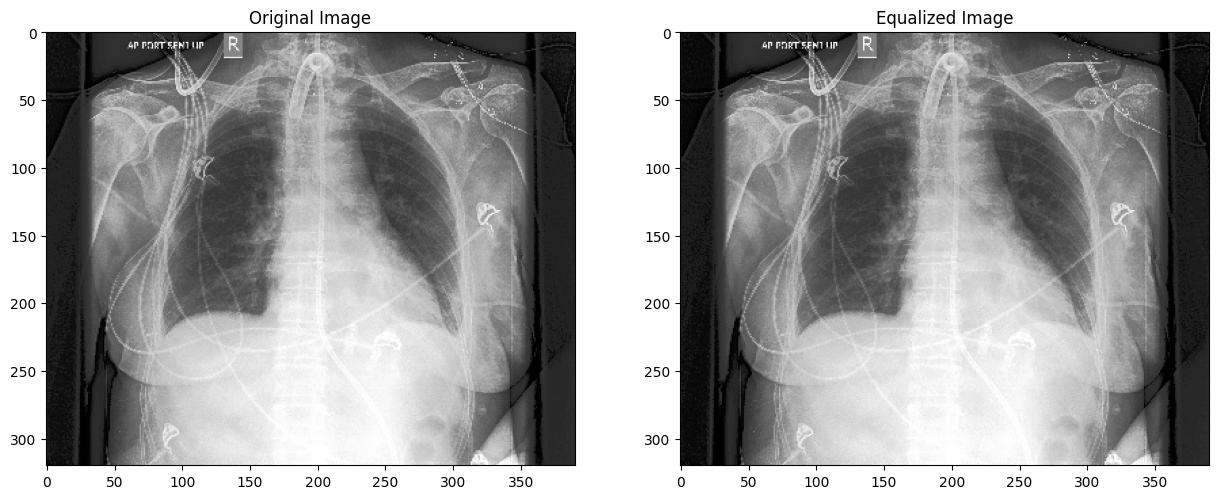

In [4]:
def he_img(img):
    return cv2.equalizeHist(img)
equalized_img = he_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

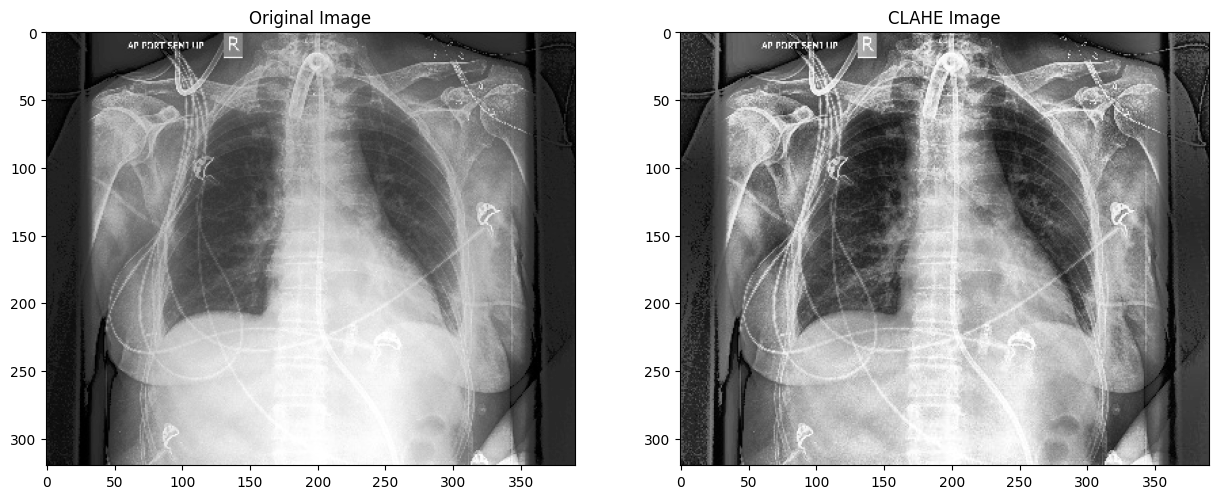

In [5]:
# Histogram Equalization CLAHE(Contrast Limited Adaptive Histogram Equalization)
def clahe_image(img):
    clahe = cv2.createCLAHE(clipLimit=2.,tileGridSize=(8,8))
    cl_img = clahe.apply(img)
    return cl_img
        
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(clahe_image(img), cmap='gray')
plt.title('CLAHE Image')
plt.show()

### Data Augmentation
- 데이터의 수를 증가시켜 학습, 평가용 데이터를 추가 확보
- 데이터의 표본(n수)이 적을 때 주로 사용

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 윈도우 버전 문제로 잠시 보류

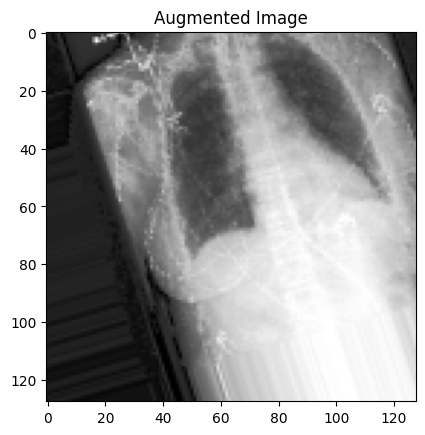

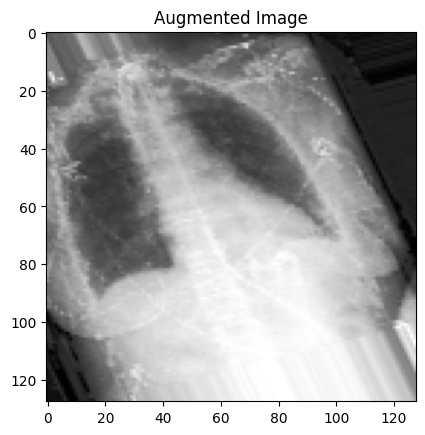

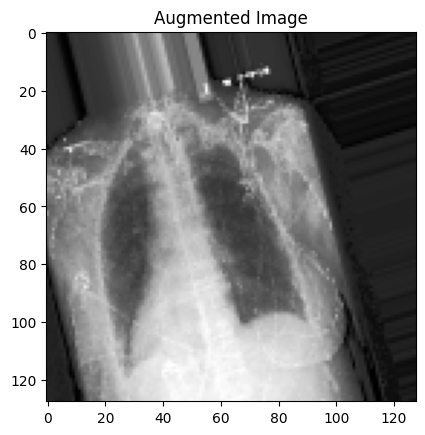

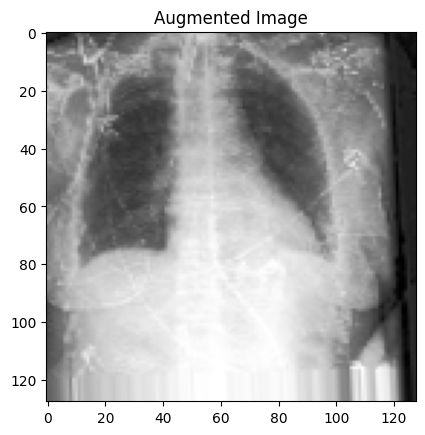

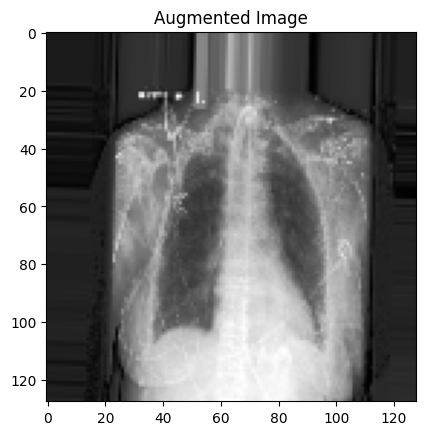

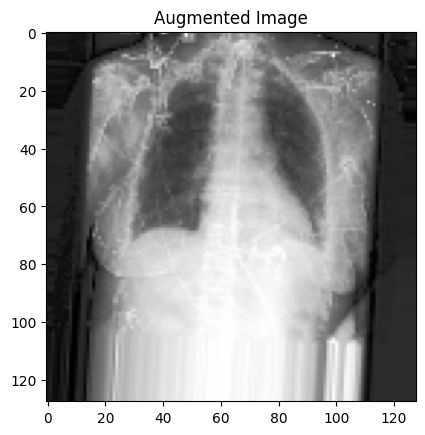

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
# data 경로 설정
# data_dir = 'C:/Users/KOREAVC/Desktop/pnuemonia/Positive' # 본인 파일 경로
img_name = os.listdir(data_dir)[42] # 42번째 파일명
img_path = os.path.join(data_dir, img_name) # 파일 전체 경로
img = image.load_img(img_path, color_mode='grayscale', target_size=(128, 128)) # 이미지 불러오기 & (128, 128)로 resize
img = image.img_to_array(img) # array로 변환
# data 증강 설정
datagen = ImageDataGenerator(
    rotation_range=20, # 회전 반경
    width_shift_range=0.2, # 가로 이동
    height_shift_range=0.2, # 세로 이동
    shear_range=0.2, # 이미지 기울기
    zoom_range=0.2, # 확대 배율
    horizontal_flip=True, # 좌우 반전
    fill_mode='nearest'
)
# data augmentation 및 시각화
img = img.reshape((1, ) + img.shape)
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.imshow(batch[0].reshape(128, 128), cmap='gray')
    plt.title('Augmented Image')
    plt.show()
    i += 1
    if i>=6:
        break

### Noise Reduction

In [8]:
def denoise_img(img):
    return cv2.fastNlMeansDenoising(img,None,30,7,21)

denosied_img = denoise_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(denosied_img, cmap='gray')
plt.title('Denosied Image')
plt.show()

error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/photo/src/denoising.cpp:142: error: (-5:Bad argument) Unsupported depth! Only CV_8U is supported for NORM_L2 in function 'fastNlMeansDenoising'


### Image Normalization
- 데이터 정규화 처리
- 연산 효율 높이고 정규성을 생성

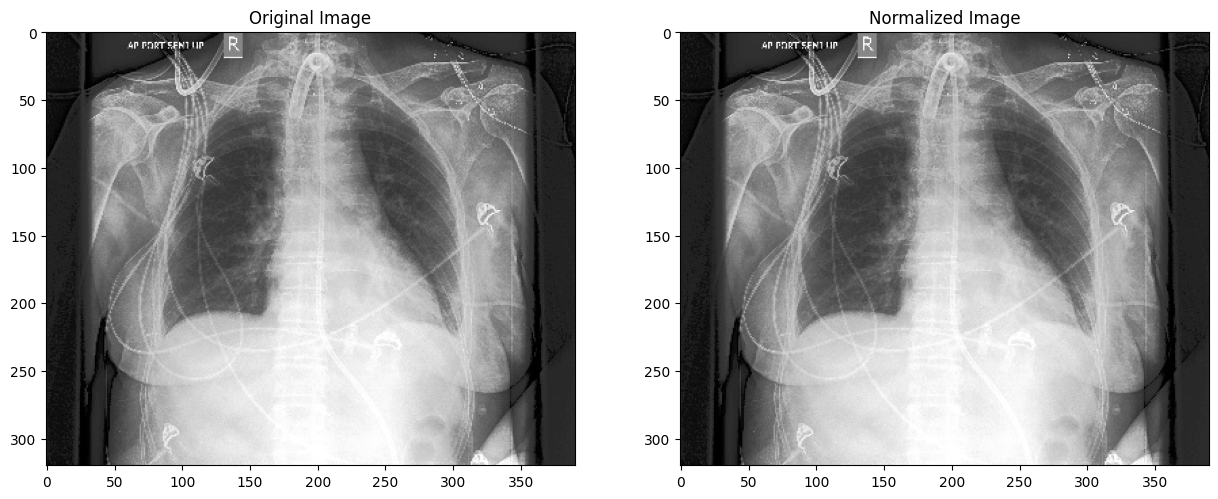

In [ ]:
def normalize_img(img):
    return cv2.normalize(img,None,0,255,cv2.NORM_MINMAX)

normalized_img = normalize_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(normalized_img, cmap='gray')
plt.title('Normalized Image')
plt.show()

### Edge Detection

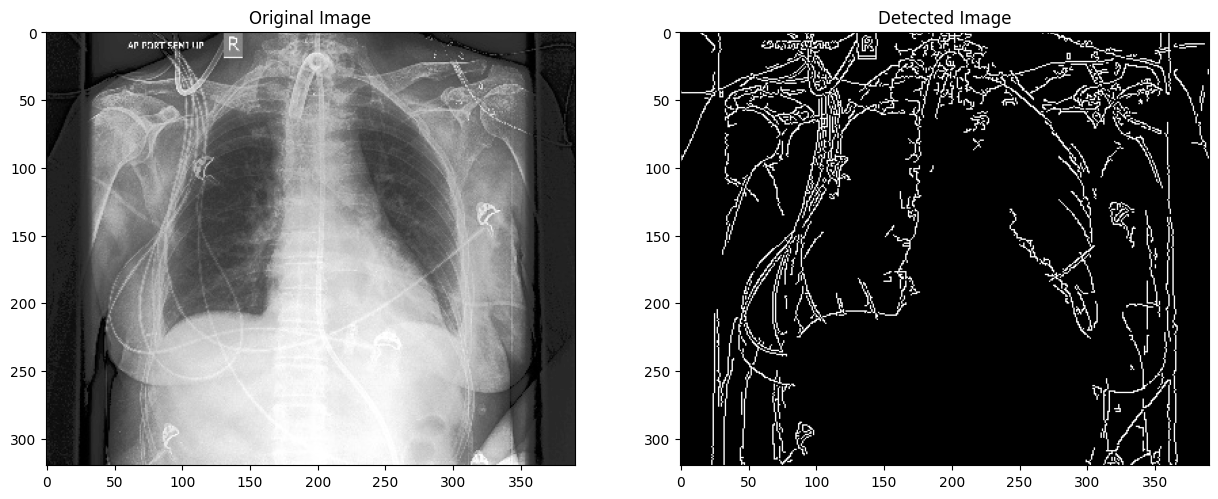

In [ ]:
def detect_edge(img):
    return cv2.Canny(img,100,200)

detected_img = detect_edge(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(detected_img, cmap='gray')
plt.title('Detected Image')
plt.show()

### Blurring

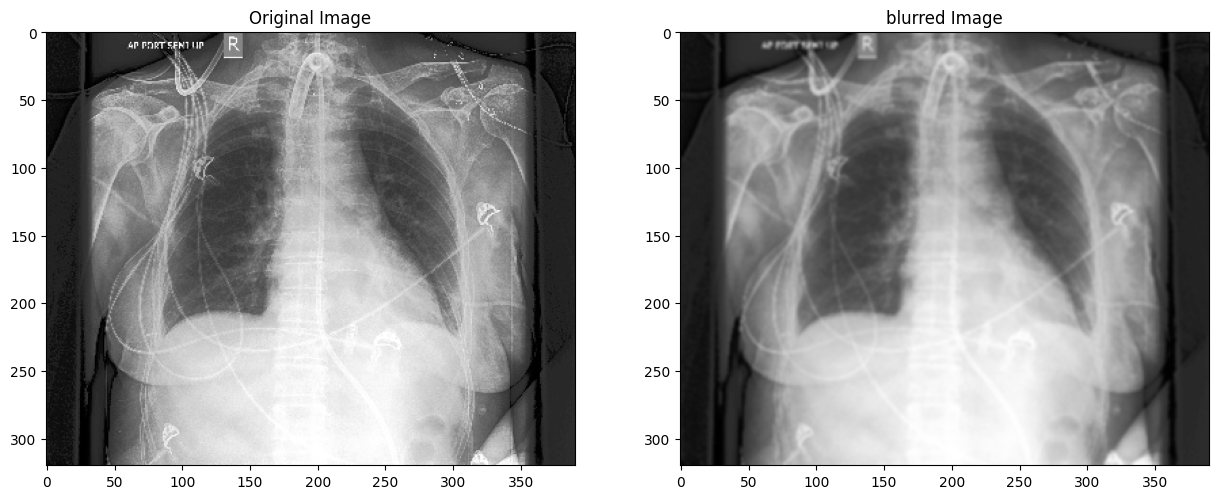

In [ ]:
def blur_img(img):
    return cv2.GaussianBlur(img,(5,5),0)

blurred_img = blur_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title('blurred Image')
plt.show()

### Contour Detection

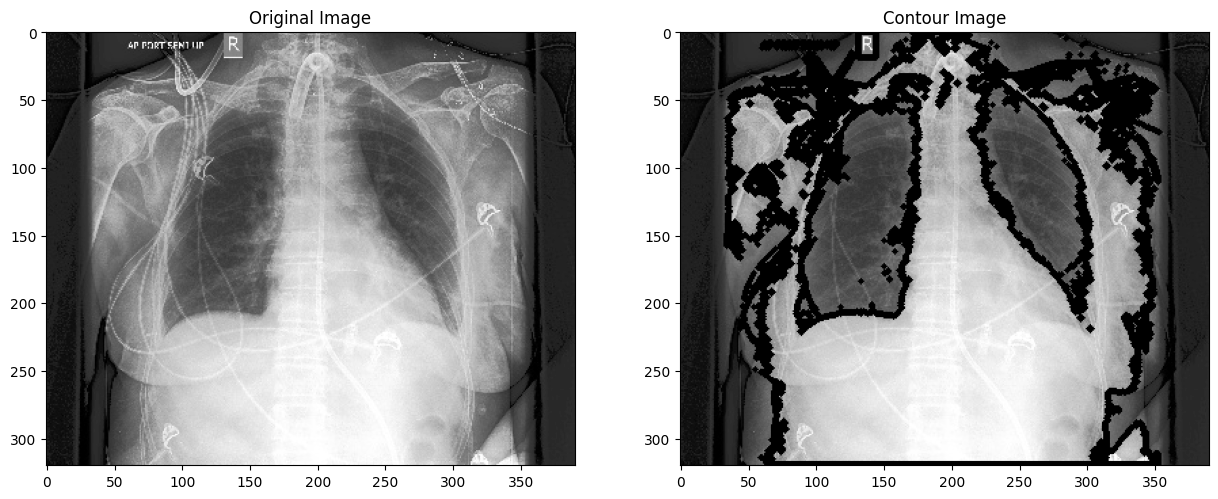

In [ ]:
def find_contour(img):
    ret, thresh = cv2.threshold(img, 127, 255, 0)
    contours, hiearchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

contours = find_contour(img)
contour_img = cv2.drawContours(img.copy(),contours, -1, (0,255,0), 3)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(contour_img, cmap='gray')
plt.title('Contour Image')
plt.show()

### Data Preparing

In [ ]:
def load_data(data_dir):
    images = []
    # labels = []
    for img_path in os.listdir(data_dir):
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img = resize_image(img)
        img = clahe_image(img)
        img = normalize_img(img)
        images.append(img)
        
    prepared_datas = np.array(images)
    return prepared_datas
        